<a href="https://colab.research.google.com/github/saqib-rgb/ML-With-Pytorch/blob/main/PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. What is computer vision?
Computer vision is a field of artificial intelligence (AI) that enables computers and systems to derive meaningful information from digital images, videos and other visual inputs — and take actions or make recommendations based on that information. If AI enables computers to think, computer vision enables them to see, observe and understand.

## 1.1 Architecture of Convolution Neural Network(Typical:can be different)
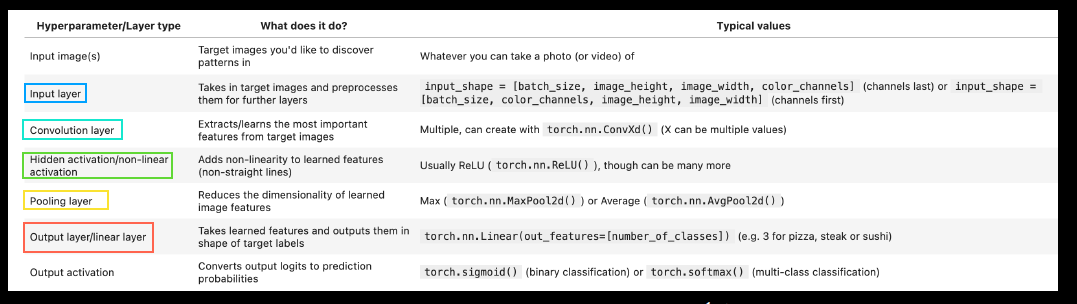

## 0. Computer vision libraries
* `torchvision`-base domain library fro PyTorch vision problems
* `torchvision.datasets`-get datasets and data loading functions for computer vision
* `torchvision.models`-geta pretrained models with trained weights to leverage for your own computer vission problem
* `torchvision.transform`-functions for manipulating your vision data(images ) to be suitable for use with an ML model
* `torch.utils.data.Dataset`-Base datasets class fro PyTorch
* `torch.utils.data.Dataloader`-creates a python iterable over a dataset



In [1]:
# import pytorch
import torch
from torch import nn
# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
# import matplotlib for visualization
import matplotlib.pyplot as plt

# checking versions
print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


## 1. getting a datasets

The dataset we will be using FashionMnist

In [2]:
# Setup training data
train_data=datasets.FashionMNIST(
    root='data',# where are we going to download data
    train=True,# do we want  training datasets
    download=True, # do we want to download th data
    transform=torchvision.transforms.ToTensor(),# how we want to transform th data
    target_transform=None# how do we want to transform the labels/targets?
)
test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None    
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image,label=train_data[0]
image,label 

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# check the shape of our image
print(f'Image shape:{image.shape}-> (color_channels,height,width)')
print(f'Image label:{class_names[label]}')

Image shape:torch.Size([1, 28, 28])-> (color_channels,height,width)
Image label:Ankle boot


## 1.2 Visualizing our data

Image Shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

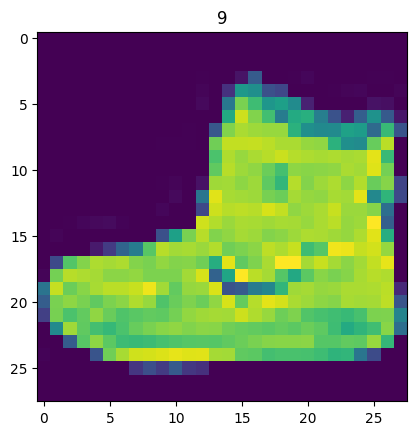

In [8]:
import matplotlib.pyplot as plt
image,label=train_data[0]
print(f'Image Shape:{image.shape}')
plt.imshow(image.squeeze())
plt.title(label)
# image

(-0.5, 27.5, 27.5, -0.5)

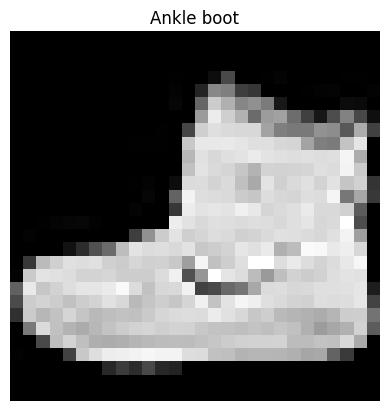

In [9]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

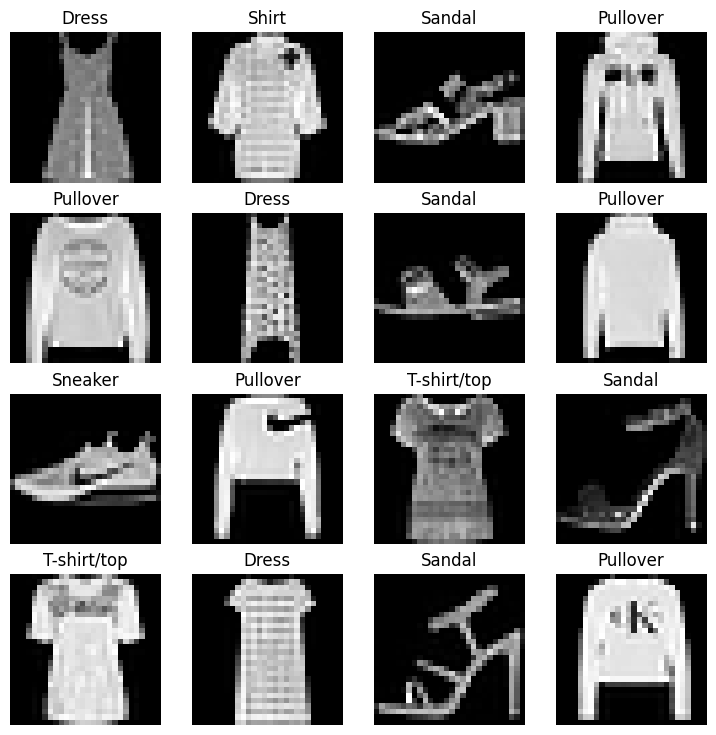

In [10]:
# Plot more images
# torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)


from numpy.lib.function_base import iterable
## 2. Prepare Dataloader
* Right now, our data is in the form of PyTorch Datasets
* Dataloader turns our dataset into a Python iterable
* More specifically we want to turn our data into mini-batches---*why?*

1. It is computationally efficient
2. Most often the batch size is 32 a multiple of 32.
3. More chances for our model to updatetheir gradients

In [11]:
# importing data loader
from torch.utils.data import DataLoader

# Setup hyperparameters
BATCH_SIZE=32
# Turn data into batches
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f504da58910>,
 <torch.utils.data.dataloader.DataLoader at 0x7f504dabe400>)

In [12]:
# let us check what we have created
print(f'dataloader:{train_dataloader,test_dataloader}')
print(f'length oftrain_dataloader:{len(train_dataloader)}')
print(f'length of test_dataloader:{len(test_dataloader)}')

dataloader:(<torch.utils.data.dataloader.DataLoader object at 0x7f504da58910>, <torch.utils.data.dataloader.DataLoader object at 0x7f504dabe400>)
length oftrain_dataloader:1875
length of test_dataloader:313


In [13]:
# check out what is inside the training dataloader
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
label:8


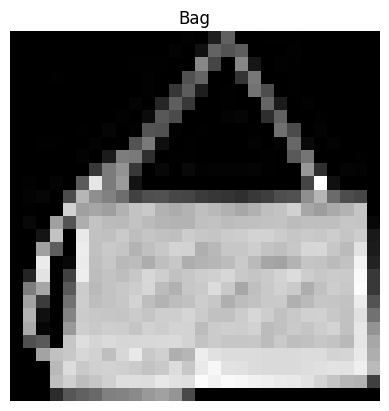

In [14]:
# Show a sample
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size:{img.shape}')
print(f'label:{label}')

## 3. Model 0: Build a baseline model

when starting to build a series of machine learning modelling experiments, it is best practice to build a baseline model

A baseline model is a simple model you will build on or improve upon susequent experiments

In [15]:
# Creating the flatten layer
flatten_model=nn.Flatten()

# get a single sample
x=train_features_batch[0]

# let us flatten themodel

output=flatten_model(x)# making a forward pass

# print out what has happened
print(f'Shape before flattening:{x.shape}')
print(f'shape after flattening:{output.shape}')

Shape before flattening:torch.Size([1, 28, 28])
shape after flattening:torch.Size([1, 784])


In [16]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)   
    )
  def forward(self,x):
     return self.layer_stack(x)



In [17]:
torch.manual_seed(42)
# set up an instance of our model
model_0=FashionMNISTModelV0(
    input_shape=784,# how many input 
    hidden_units=10,# how many hidden units
    output_shape=len(class_names)
).to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss/optimizer and evaluation metrics

* Loss function- since we are working with multiclass data so our loss function will be `nn.CrossEntropyLoss()`

* Optimizer- our optimizer `torch.optim.SGD` (stochastic gradient descent)

* Evaluation Metric- since we are working with classification metric and our dataset seems to balanced we will us `aacuracy` as evaluation metric

In [19]:
import requests
from pathlib import Path

# Download helper function 
if Path ('helper_function.py').is_file():
  print('helper functions already exist')
else:
  print('downloading file')
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py','wb') as f:
    f.write(request.content)



downloading file


In [20]:
# Import the accuracy metric
from helper_functions import accuracy_fn

# set up loss function
loss_fn=nn.CrossEntropyLoss()
# set up optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)


### 3.2 creating a function to time our experiments
Machine learning is very experimental

Two of the main things you will often want to track are:
1. Model's perfromance (loss and accuracy)
2. How fast it runs

In [21]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  """ Prints diffrenec between start and end time."""
  total_time=end-start
  print(f'total time on{device}:{total_time:.3f} seconds')
  return total_time

In [22]:
# let us see how are we going to implement the build function
start_time=timer()
#some code
end_time=timer()
print_train_time(start=start_time,end=end_time,device='cpu')

total time oncpu:0.000 seconds


4.4892999994772254e-05

### 3.3 Creating a training loop and training it on the batches of data

1. Loop throgh number of epochs
2. loop through training batches, perform training steps,calculate the train loss*per batch*
3. loop through testing batyches, perform testing steps, calculate the test loss *per batch*
4. Time it all

In [23]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

total time oncpu:34.762 seconds


## 4. Make predictions and get model_0 results


In [24]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  """ Returns a dictionary containing the results of model predicting on data_loader"""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # make predictions
      y_pred=model(X)

      # accumulate the loss and acc values per vatch
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,
                       y_pred=y_pred.argmax(dim=1))
    loss/=len(data_loader)
    acc/=len(data_loader)
  return{'model_name':model.__class__.__name__,
         'model_loss':loss.item(),
         'model_acc':acc}
  

  

In [25]:
# let us test out the evaluation function we build above
model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [26]:
## Set up device agnostic code(for using a GPU)
import torch
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6. Model 1: Building a better model with Non-Linearity


In [27]:
# let us do some experiment and make a model that is a mixture of linear and non-linear model
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)
      

In [28]:
# Create an instance of model_1
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

In [29]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [30]:
### 6.1 Setup loss, optimizer and evaluation metrics
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)


### 6.2 Creating training and testing loop
Functionizing them both
1. Train step 
2. test step

In [31]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  
   """Performs a training with model trying to learn on dataloader."""
   train_loss,train_acc=0,0 
  # Put model into training mode
   model.train()
  # Add a loop to loop through training batches
   for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X,y=X.to(device),y.to(device)
    # 1. Forward pass
    y_pred = model(X)
    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulatively add up the loss per epoch 
    train_acc+=accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1))
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()


    # Divide total train loss by length of data_loader (average loss per batch per epoch)
    
   train_loss /= len(data_loader)
   train_acc/=len(data_loader)
   print(f'Train loss: {train_loss:.5f}| Train acc:{train_acc:.2f}%')
  


In [32]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  """ Performs a testing loop step on model going over data_loader"""
  ### Testing
  # Setup variables for accumulatively adding up loss and accuracy 
  test_loss, test_acc = 0, 0 
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
    # send data to target device
      X,y=X.to(device),y.to(device)
    # 1. Forward pass
      test_pred = model(X)
    # 2. Calculate loss (accumatively)
      test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch
    # 3. Calculate accuracy (preds need to be same as y_true)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    # Calculations on test metrics need to happen inside torch.inference_mode()
    # Divide total test loss by length of test dataloader (per batch)
    test_loss /= len(test_dataloader)
  # Divide total accuracy by length of test dataloader (per batch)
    test_acc /= len(test_dataloader)
    print(f'test loss:{test_loss:.5f} | Test acc:{test_acc}')
  

In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# measure time
from timeit import default_timer as timer
train_time_start_on_gpu=timer()
# Set epoch
epochs=3

for epoch in tqdm(range(epochs)):
  print(f'Epoch:{epoch}\n-------')
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,
                                          end=train_time_end_on_gpu,
                                          device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------
Train loss: 1.09199| Train acc:61.34%
test loss:0.95636 | Test acc:64.99600638977635
Epoch:1
-------
Train loss: 0.78101| Train acc:71.93%
test loss:0.72227 | Test acc:73.91174121405751
Epoch:2
-------
Train loss: 0.67027| Train acc:75.94%
test loss:0.68500 | Test acc:75.01996805111821
total time oncuda:38.308 seconds


In [34]:
!nvidia-smi

Fri Mar 31 15:08:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    26W /  70W |    805MiB / 15360MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [35]:
total_train_time_model_0

34.762292376000005

**Note:**
> Sometimes you will observe that depending on the data sometimes your cpu will train faster than gpu
**Reason:**
1. It could be that the overhead of copying data/model from the GPU overweighs the compute benefits offered by the GPU


# The previous eval model we built was not composed of device agnostic code let us add it into it

In [36]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  """ Returns a dictionary containing the results of model predicting on data_loader"""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # device agnostiv code
      X,y=X.to(device),y.to(device)
      # make predictions
      y_pred=model(X)

      # accumulate the loss and acc values per vatch
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,
                       y_pred=y_pred.argmax(dim=1))
    loss/=len(data_loader)
    acc/=len(data_loader)
  return{'model_name':model.__class__.__name__,
         'model_loss':loss.item(),
         'model_acc':acc}
  

  

In [37]:
model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [38]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [39]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building A convolution Neural Network(CNN)
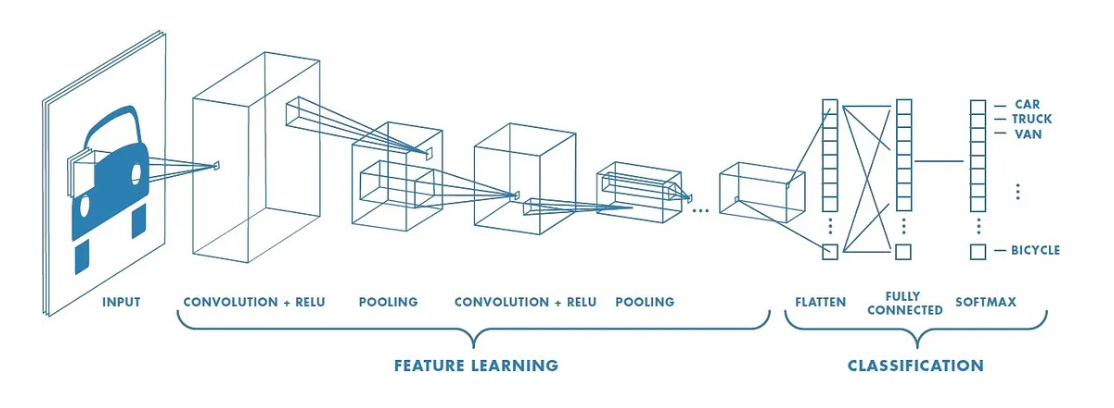

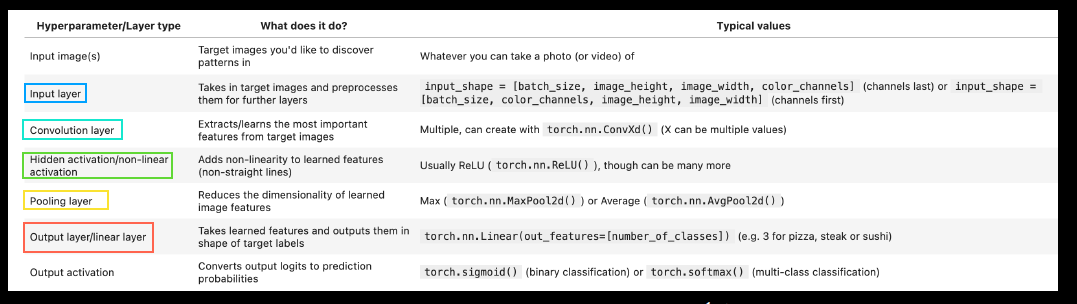

1. CNNS are also known as ConvNets
2. CNN's are known for their capabilities to find pattern in visual data


*importnat link*:
https://poloclub.github.io/cnn-explainer/

*For better understanding use this link*

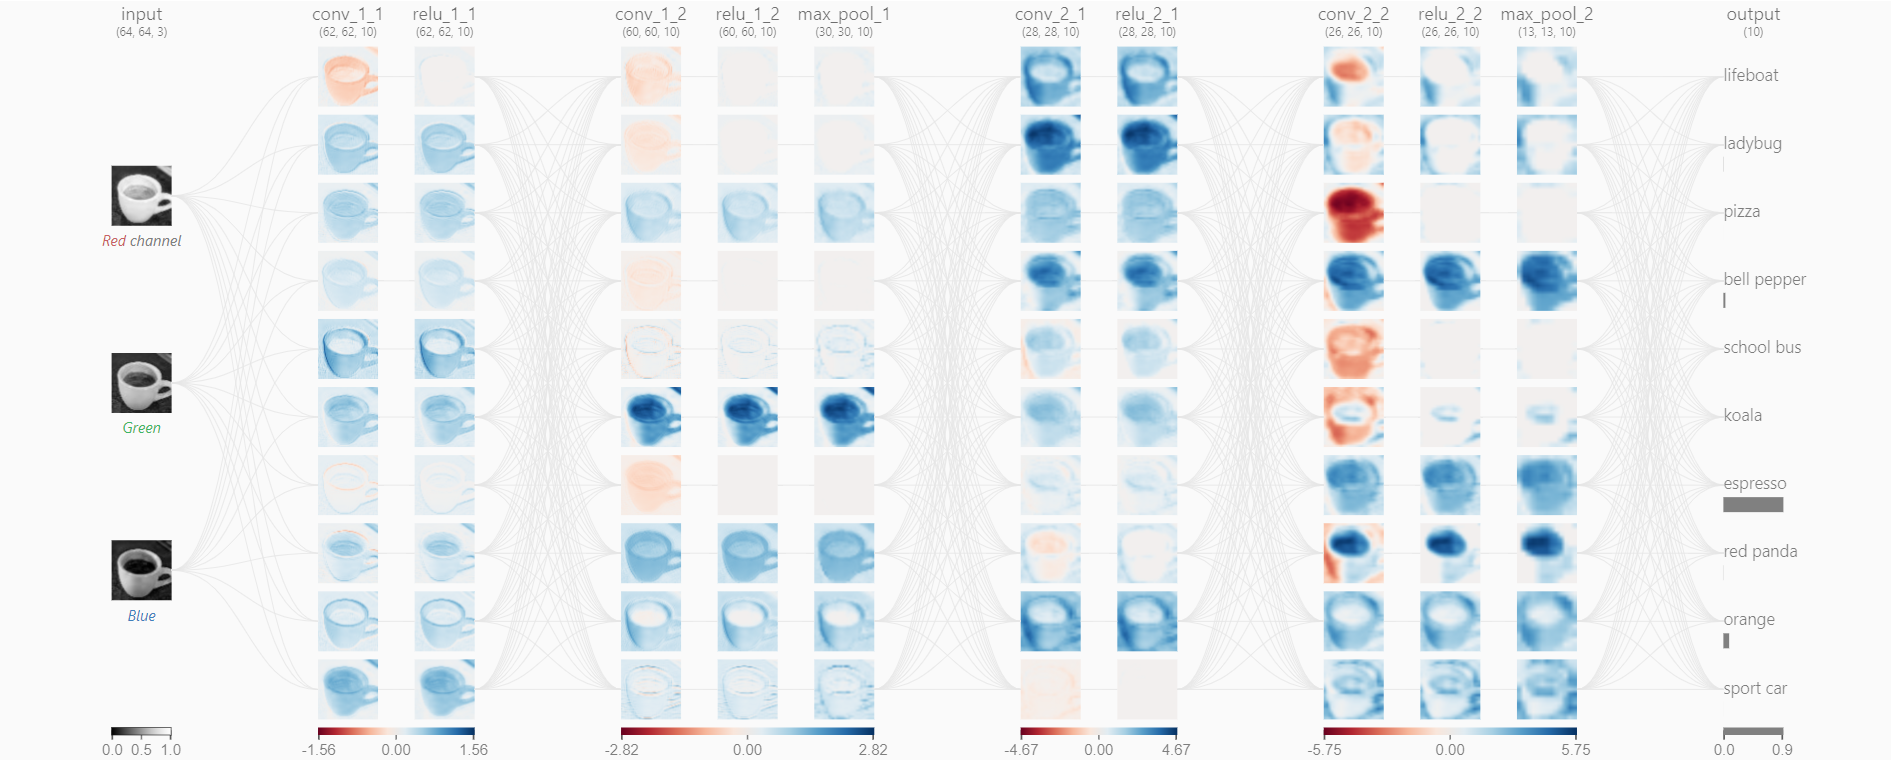

In [44]:
# Create a convolution neural network
class FashionMNISTModelV2(nn.Module):# replicates the TinyVGG model 
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),# values that we can set ourselves
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*0,
                  out_features=output_shape)
    )
  def forward(self,x):
    x=self.conv_block_1(x)
    print(x.shape)
    x=self.conv_block_2(x)
    print(x.shape)
    x=self.classifier(x)
    print(x.shape)
    return x




In [45]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

/usr/local/lib/python3.9/dist-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


### 7.1 Stepping through nn.Conv2d

In [48]:
torch.manual_seed(42)
# create a batch of images
images=torch.randn(size=(32,3,64,64))
test_image=images[0]


print(f'Image batch shape:{images.shape}')
print(f'single image shape:{test_image.shape}')
print(f'Test image:\n{test_image}')

Image batch shape:torch.Size([32, 3, 64, 64])
single image shape:torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.79

In [51]:
test_image.shape

torch.Size([3, 64, 64])

In [50]:
# create a single conv2d layer
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=0)
# pass the data
conv_output=conv_layer(test_image)
conv_output

tensor([[[ 0.8840,  1.2855, -0.6938,  ..., -0.1823,  1.4906, -0.2368],
         [ 1.0004,  0.1740,  1.0329,  ..., -0.0685,  0.6052,  0.6605],
         [ 0.9175,  0.1427, -0.9709,  ..., -0.5122, -0.5386,  0.5073],
         ...,
         [ 0.0266, -0.5086, -0.1345,  ...,  1.5446,  0.5166, -0.6673],
         [-0.4289, -0.2467,  0.4364,  ..., -0.4799, -0.9574,  0.4959],
         [-0.2100, -0.1789, -0.3779,  ..., -0.4869,  0.8026, -0.7287]],

        [[-0.3608, -0.5562, -0.7238,  ...,  0.1430, -1.0769, -0.5741],
         [-1.1621, -1.2525,  0.3459,  ..., -0.2199, -0.6592, -1.2581],
         [-1.6863, -0.2929, -0.4617,  ..., -0.8247,  0.2248, -0.4482],
         ...,
         [-0.0250, -0.4791, -0.1464,  ...,  0.0047,  0.0669, -0.6104],
         [ 0.3110, -0.1358,  0.5121,  ...,  0.4152,  0.2123,  0.0454],
         [-0.4532, -0.3368, -0.2854,  ...,  0.5896,  0.5531,  1.1727]],

        [[-1.5217, -0.0225,  1.5995,  ..., -0.5065,  0.0340, -0.1658],
         [ 0.4983, -0.1437, -1.2099,  ..., -1

In [52]:
conv_output.shape

torch.Size([10, 62, 62])